# Traffic EDA


In this notebook the data on traffic is explored by having a closer look at statistics and visualising it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta
from calendar import monthrange
from calendar import month_name
import matplotlib.patches as patches

In [2]:
df = pd.read_csv('../data/compiled-zähstellen.csv')

In [3]:
df.head()

,datetime,Zählstelle,PKW,LKW,Gesamt
0,2012-01-01 00:30:00,1022,160,4,164
1,2012-01-01 01:30:00,1022,481,1,482
2,2012-01-01 02:30:00,1022,593,1,594
3,2012-01-01 03:30:00,1022,444,4,448
4,2012-01-01 04:30:00,1022,317,3,320


The column names are in German and unfortunately contain umlauts. Thus one column is renamed.

In [4]:
df = df.rename(columns={"Zählstelle": "stelle"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269712 entries, 0 to 269711
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   datetime  269712 non-null  object
 1   stelle    269712 non-null  int64 
 2   PKW       269712 non-null  int64 
 3   LKW       269712 non-null  int64 
 4   Gesamt    269712 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 10.3+ MB


All rows contain data, there are no NaNs.

In [7]:
df.stelle.unique()

array([1022, 1061, 1077, 1081, 1173])

In this EDA only five of the traffic counting stations are explored.

As a first step, the distribution of vehicle counts per hour for each station and vehicle type are visualized.

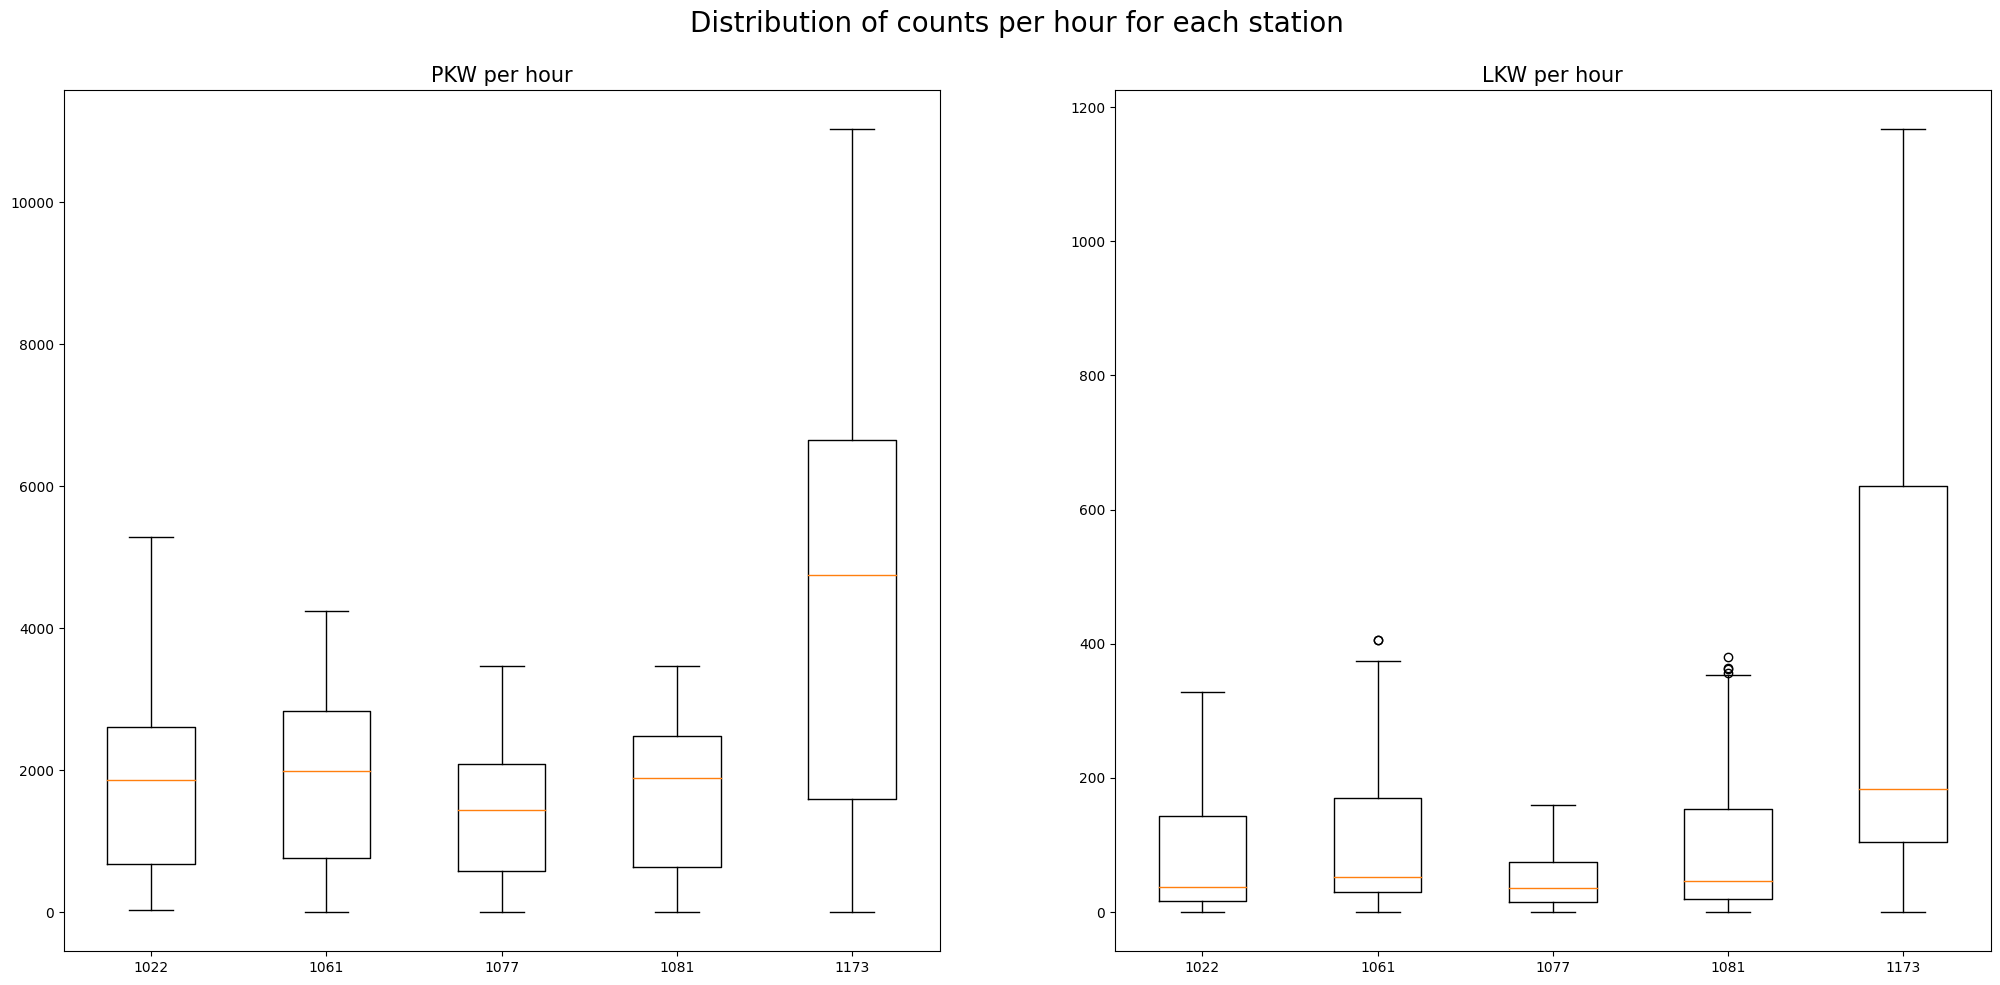

In [8]:
pkw = [df[df['stelle']==1022].PKW, df[df['stelle']==1061].PKW, df[df['stelle']==1077].PKW, df[df['stelle']==1081].PKW, df[df['stelle']==1173].PKW]
lkw = [df[df['stelle']==1022].LKW, df[df['stelle']==1061].LKW, df[df['stelle']==1077].LKW, df[df['stelle']==1081].LKW, df[df['stelle']==1173].LKW]
station_labels = ['1022', '1061', '1077', '1081', '1173']

fig, ax = plt.subplots(1,2, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of counts per hour for each station', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0].boxplot(x = pkw) # creates boxplot for PKW
ax[0].set_xticklabels(labels=station_labels)
ax[0].set_title("PKW per hour", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = lkw)
ax[1].set_xticklabels(labels=station_labels)
ax[1].set_title("LKW per hour", fontsize = 15);

For additional evaluation, several columns regarding the date (weekday, month etc.) are added to the dataframe.

In [9]:
# Create working copy of dataframe
data_df = df.copy()

# Convert timestamp to datetime object
# Extract additional features from timestamp column
data_df = data_df.assign(
    datetime = lambda x: pd.to_datetime(x['datetime']), 
    date = lambda x: x['datetime'].dt.date,
    year = lambda x: x['datetime'].dt.year,
    month = lambda x: x['datetime'].dt.month,
    day = lambda x: x['datetime'].dt.day,
    dayofyear = lambda x: x['datetime'].dt.dayofyear,
    hour = lambda x: x['datetime'].dt.hour,
    weekday = lambda x: x['datetime'].dt.weekday, # Monday = 0
)

data_df.head()

,datetime,stelle,PKW,LKW,Gesamt,date,year,month,day,dayofyear,hour,weekday
0,2012-01-01 00:30:00,1022,160,4,164,2012-01-01,2012,1,1,1,0,6
1,2012-01-01 01:30:00,1022,481,1,482,2012-01-01,2012,1,1,1,1,6
2,2012-01-01 02:30:00,1022,593,1,594,2012-01-01,2012,1,1,1,2,6
3,2012-01-01 03:30:00,1022,444,4,448,2012-01-01,2012,1,1,1,3,6
4,2012-01-01 04:30:00,1022,317,3,320,2012-01-01,2012,1,1,1,4,6


In [10]:
df1022 = data_df[data_df['stelle']==1022]
df1061 = data_df[data_df['stelle']==1061]
df1077 = data_df[data_df['stelle']==1077]
df1081 = data_df[data_df['stelle']==1081]
df1173 = data_df[data_df['stelle']==1173]


A pivot table can give a brief overview on the distribution of vehicles per hour or day.

In [11]:
piv_pkw= pd.DataFrame()
piv_pkw['1022'] = pd.pivot_table(df1022, ['PKW'], index='hour', aggfunc=np.mean)
piv_pkw['1061'] = pd.pivot_table(df1061, ['PKW'], index='hour', aggfunc=np.mean)
piv_pkw['1077'] = pd.pivot_table(df1077, ['PKW'], index='hour', aggfunc=np.mean)
piv_pkw['1081'] = pd.pivot_table(df1081, ['PKW'], index='hour', aggfunc=np.mean)
piv_pkw['1173'] = pd.pivot_table(df1173, ['PKW'], index='hour', aggfunc=np.mean)

In [12]:
piv_pkw

,1022,1061,1077,1081,1173
hour,,,,,
0,244.317652,589.852383,497.488564,389.151356,1120.354167
1,126.802975,399.764461,352.511436,243.968434,742.055233
2,92.169682,310.469227,269.775669,167.317280,568.707364
3,201.912344,306.928737,249.353771,204.378794,564.121124
4,530.980298,402.523832,302.274939,398.575476,943.648740
5,1494.603940,912.409995,508.905596,1258.243626,2853.376938
6,2149.142340,1744.359093,922.859854,1943.154593,5237.010174
7,2791.905509,2332.732531,1538.171290,2009.735330,5816.663760
8,2851.065943,2532.991208,1899.572263,1892.182922,5620.903585


In [13]:
piv_pkw_day= pd.DataFrame()
piv_pkw_day['1022'] = pd.pivot_table(df1022, ['PKW'], index='weekday', aggfunc=np.mean)*24
piv_pkw_day['1061'] = pd.pivot_table(df1061, ['PKW'], index='weekday', aggfunc=np.mean)*24
piv_pkw_day['1077'] = pd.pivot_table(df1077, ['PKW'], index='weekday', aggfunc=np.mean)*24
piv_pkw_day['1081'] = pd.pivot_table(df1081, ['PKW'], index='weekday', aggfunc=np.mean)*24
piv_pkw_day['1173'] = pd.pivot_table(df1173, ['PKW'], index='weekday', aggfunc=np.mean)*24

In [14]:
piv_lkw= pd.DataFrame()
piv_lkw['1022'] = pd.pivot_table(df1022, ['LKW'], index='hour', aggfunc=np.mean)
piv_lkw['1061'] = pd.pivot_table(df1061, ['LKW'], index='hour', aggfunc=np.mean)
piv_lkw['1077'] = pd.pivot_table(df1077, ['LKW'], index='hour', aggfunc=np.mean)
piv_lkw['1081'] = pd.pivot_table(df1081, ['LKW'], index='hour', aggfunc=np.mean)
piv_lkw['1173'] = pd.pivot_table(df1173, ['LKW'], index='hour', aggfunc=np.mean)

In [15]:
piv_lkw_day= pd.DataFrame()
piv_lkw_day['1022'] = pd.pivot_table(df1022, ['LKW'], index='weekday', aggfunc=np.mean)*24
piv_lkw_day['1061'] = pd.pivot_table(df1061, ['LKW'], index='weekday', aggfunc=np.mean)*24
piv_lkw_day['1077'] = pd.pivot_table(df1077, ['LKW'], index='weekday', aggfunc=np.mean)*24
piv_lkw_day['1081'] = pd.pivot_table(df1081, ['LKW'], index='weekday', aggfunc=np.mean)*24
piv_lkw_day['1173'] = pd.pivot_table(df1173, ['LKW'], index='weekday', aggfunc=np.mean)*24

A more convenient way to look at the distributions is a visualisation of the mean hourly or weekday  counts at the stations.

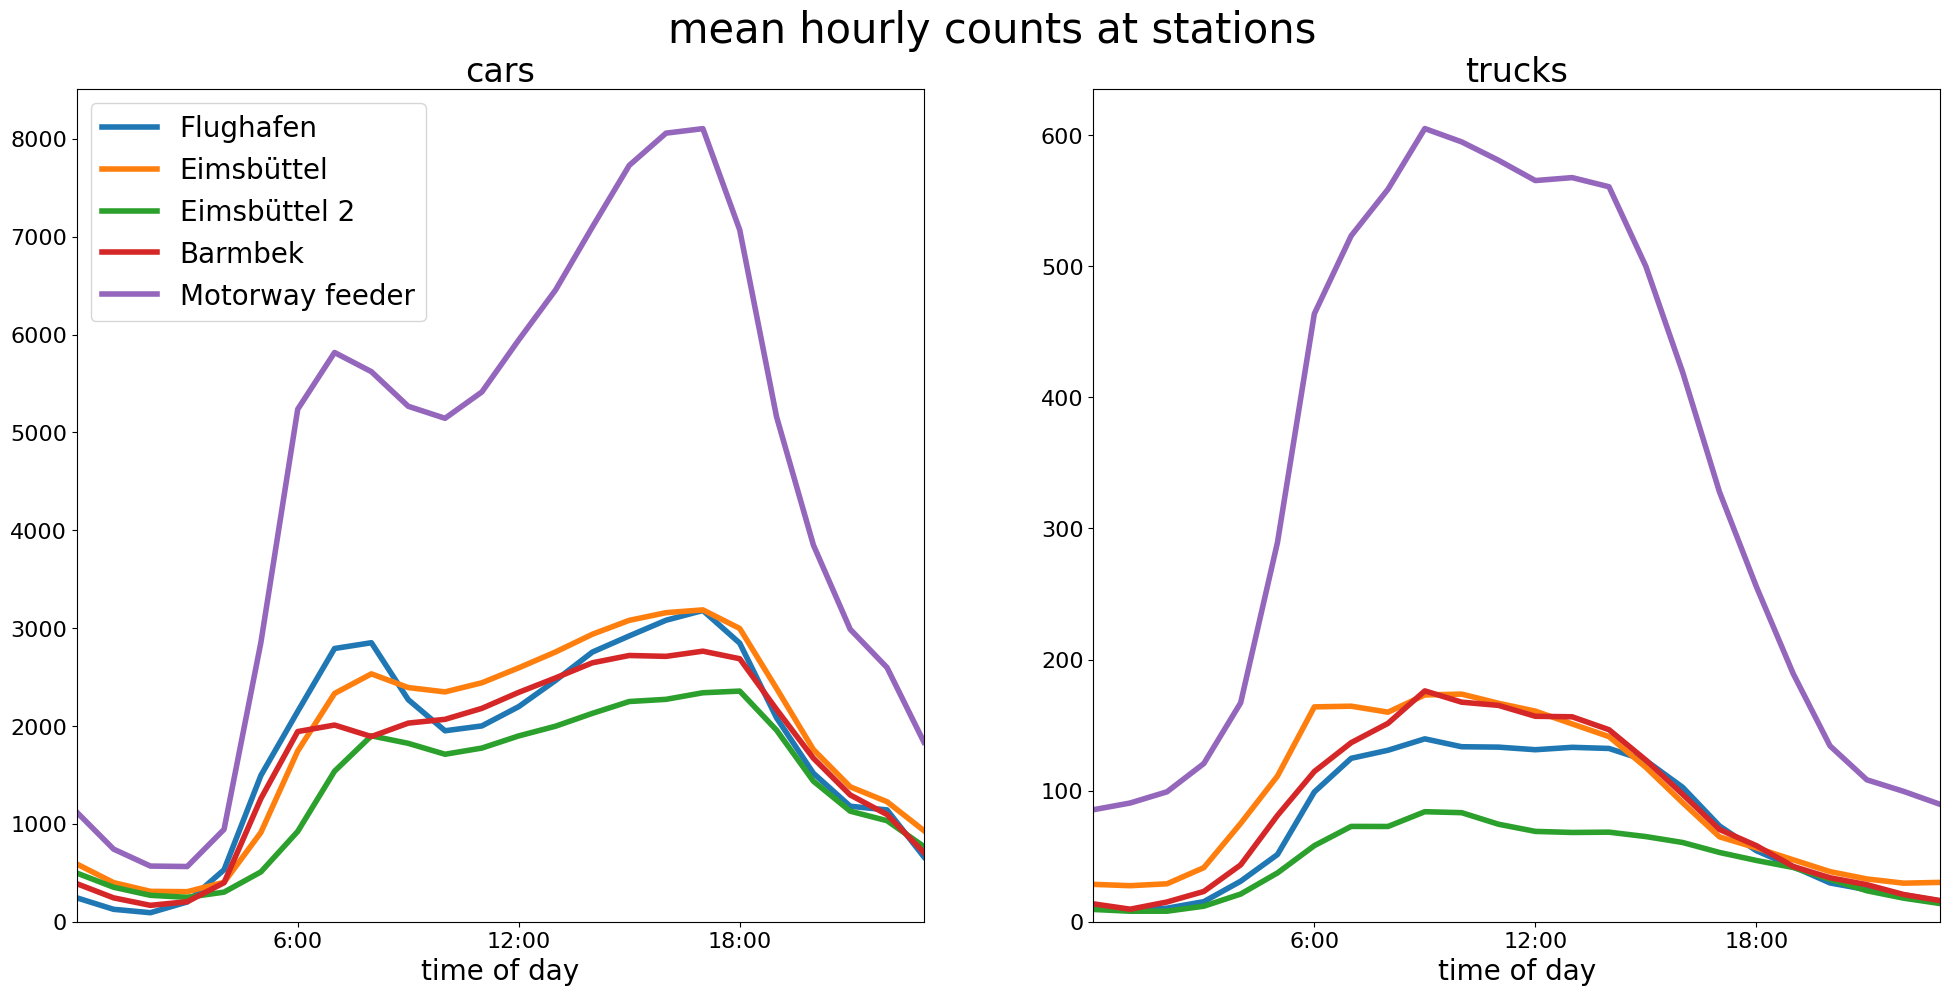

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('mean hourly counts at stations', fontsize=30)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

# Set general font size
plt.rcParams['font.size'] = '20'

	
ax[0].plot(piv_pkw, linewidth=4) # creates boxplot for PKW
ax[0].set_xlim(0, 23) 
ax[0].set_ylim(bottom=0) 
ax[0].set_xticks([6,12,18])
ax[0].set_xticklabels(['6:00','12:00','18:00']) 
ax[0].set_title("cars"); # sets title for subplot
ax[0].legend(['Flughafen','Eimsbüttel','Eimsbüttel 2', 'Barmbek', 'Motorway feeder'], loc='upper left')
ax[0].set(xlabel='time of day')

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
	label.set_fontsize(16)
;

ax[1].plot(piv_lkw, linewidth=4)
ax[1].set_xlim(0, 23) 
ax[1].set_ylim(bottom=0) 
ax[1].set_xticks([6,12,18])
ax[1].set_xticklabels(['6:00','12:00','18:00']) 
ax[1].set_title("trucks")
ax[1].set(xlabel='time of day')

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
	label.set_fontsize(16)
;


fig.savefig("../images/hourly_counts.png",dpi=300, bbox_inches="tight")

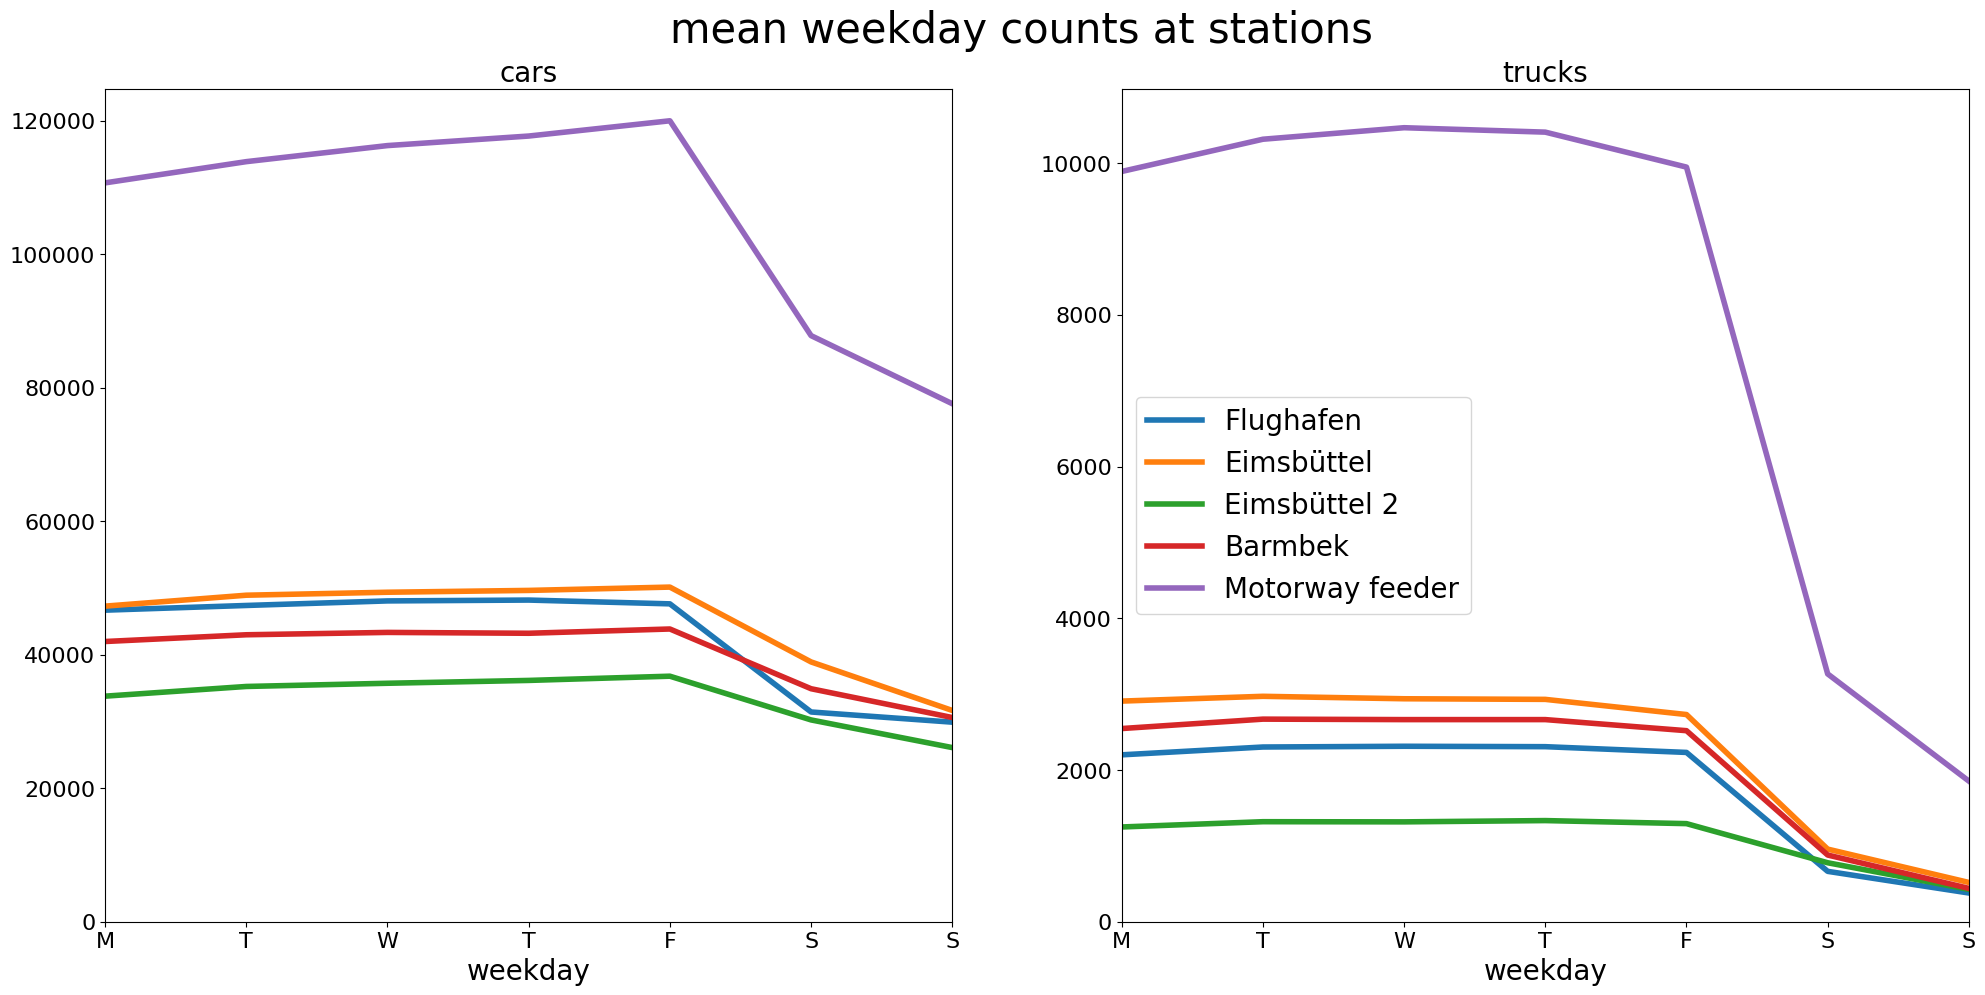

In [50]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('mean weekday counts at stations', fontsize=30)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

# Set general font size
plt.rcParams['font.size'] = '20'

ax[0].plot(piv_pkw_day, linewidth=4) # creates boxplot for PKW
ax[0].set_xlim(0, 6) 
ax[0].set_ylim(bottom=0) 
ax[0].set_title("cars", fontsize = 20); # sets title for subplot
ax[0].set(xlabel='weekday')
ax[0].set_xticks([0,1,2,3,4,5,6])
ax[0].set_xticklabels(['M', 'T', 'W', 'T', 'F', 'S', 'S'])

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
	label.set_fontsize(16)
;	



ax[1].plot(piv_lkw_day, linewidth=4)
ax[1].set_xlim(0, 6) 
ax[1].set_ylim(bottom=0) 
ax[1].set_title("trucks", fontsize = 20)
ax[1].legend(['Flughafen','Eimsbüttel','Eimsbüttel 2', 'Barmbek', 'Motorway feeder'], loc='center left')
ax[1].set(xlabel='weekday')
ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(['M', 'T', 'W', 'T', 'F', 'S', 'S'])

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
	label.set_fontsize(16)
;


fig.savefig("../images/weekday_means.png",dpi=300, bbox_inches = "tight")

Yearly seasonality can also be plotted.

In [34]:
# Aggregate PKW by day
daily_df1061 = df1061 \
    .groupby(['date', 'year', 'month', 'day', 'dayofyear'], as_index=False)\
    .agg({'PKW': np.mean}) \
    .set_index('date')

# Aggregate LKW by day
daily_df1061_lkw = df1061 \
    .groupby(['date', 'year', 'month', 'day', 'dayofyear'], as_index=False)\
    .agg({'LKW': np.mean}) \
    .set_index('date')

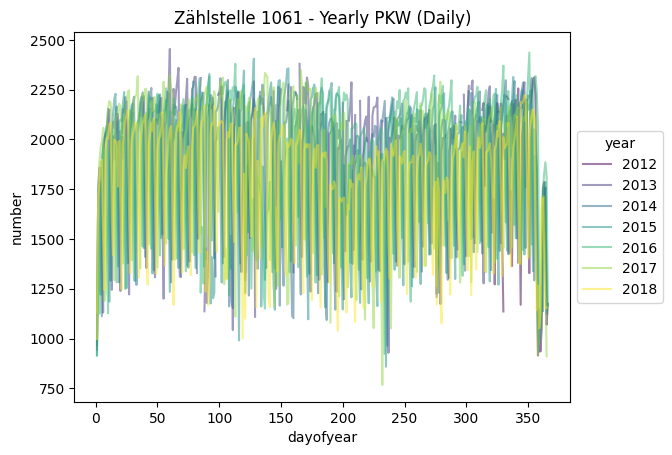

In [47]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=daily_df1061[['year', 'dayofyear', 'PKW']], index='dayofyear', columns='year') \
    ['PKW'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Zählstelle 1061 - Yearly PKW (Daily)', ylabel='number');

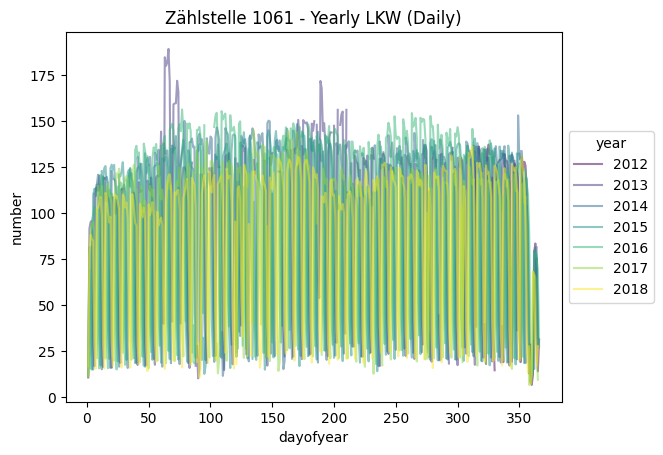

In [46]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=daily_df1061_lkw[['year', 'dayofyear', 'LKW']], index='dayofyear', columns='year') \
    ['LKW'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Zählstelle 1061 - Yearly LKW (Daily)', ylabel='number');

As the figures above are hard to interprete in the yearly seasonality an cycles, a polar plot is a more convenient visualisation. It shows the average yearly cycle of vehicle counts for each date of a year (solid line) and the range (hatching).

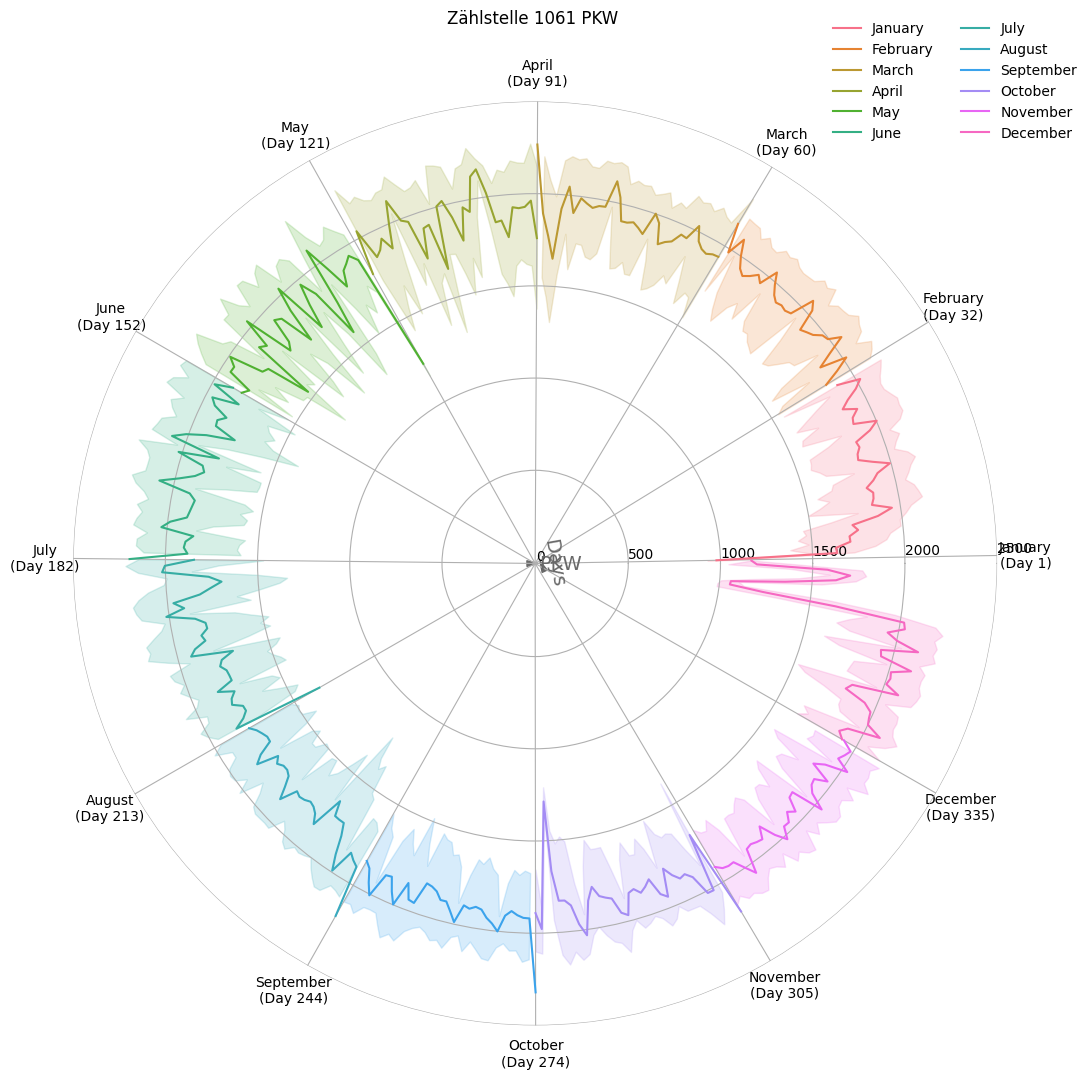

In [48]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
daily_df1061 \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='PKW', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

fancy_plot=True     #this is only to make the plot more beautiful. If you just want to see how the data looks without the adjustments to the plot set fancy_plot to False
if(fancy_plot): 
    days_per_month=[0] + [monthrange(2021, i)[1] for i in range(1,12)]      #findout how many days each month has ()
    month_start=np.cumsum(days_per_month) +1                                #add 1 to start at 0 instead of 0, take the cumsum to get ech months starting day
    month_start_theta=[i *2 * np.pi / 365.25 for i in month_start]          #turn start day into an angle (in rad), use 365.25 as the average length of a year

    month_label=[month_name[i] for i in range(1,13)]
    month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]

    ax.set_title('Zählstelle 1061 PKW ', va='bottom',pad=22);
    ax.spines.clear()
    
    ax.set_xlabel('')
    ax.set_xticks(month_start_theta)
    ax.set_xticklabels(month_label_long)
    
    ax.set_ylabel('')    
    ax.set_ylim(-5,28)
    ax.set_yticks(yt:=[0,500,1000,1500,2000,2500])
    ax.set_yticklabels([str(t) for t in yt], rotation = 45)

    #Arrows / Annotations
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="dimgrey")
    ax.set_rlabel_position(1) 
    ax.text(13*2*np.pi/360,24,"Days",size=14,color='dimgrey',rotation=-80,va='center')
    ax.text(-3*2*np.pi/360,16,"PKW",size=14,color='dimgrey',rotation=-0,va='center')
    a1 = patches.FancyArrowPatch((1*np.pi/180, -5), (1*np.pi/180, 26), **kw)

    a2 = patches.FancyArrowPatch((1*np.pi/180, 24), (25*np.pi/180, 24),
                                connectionstyle=f"arc3,rad={0.105}", **kw)
    
    ax.add_patch(a1)
    ax.add_patch(a2)


    ax.set_rorigin(-5)
    ax.xaxis.set_tick_params(which='major',pad=10)

    ax.legend(labels=month_label,ncol=2,facecolor='white',edgecolor='white',bbox_to_anchor=(1.1, 1.1), loc=1)

    ax.figure.set_figwidth(12)
    ax.figure.set_figheight(12)


#ax.figure.savefig("../images/PKW_1061_polar.png",dpi=300)

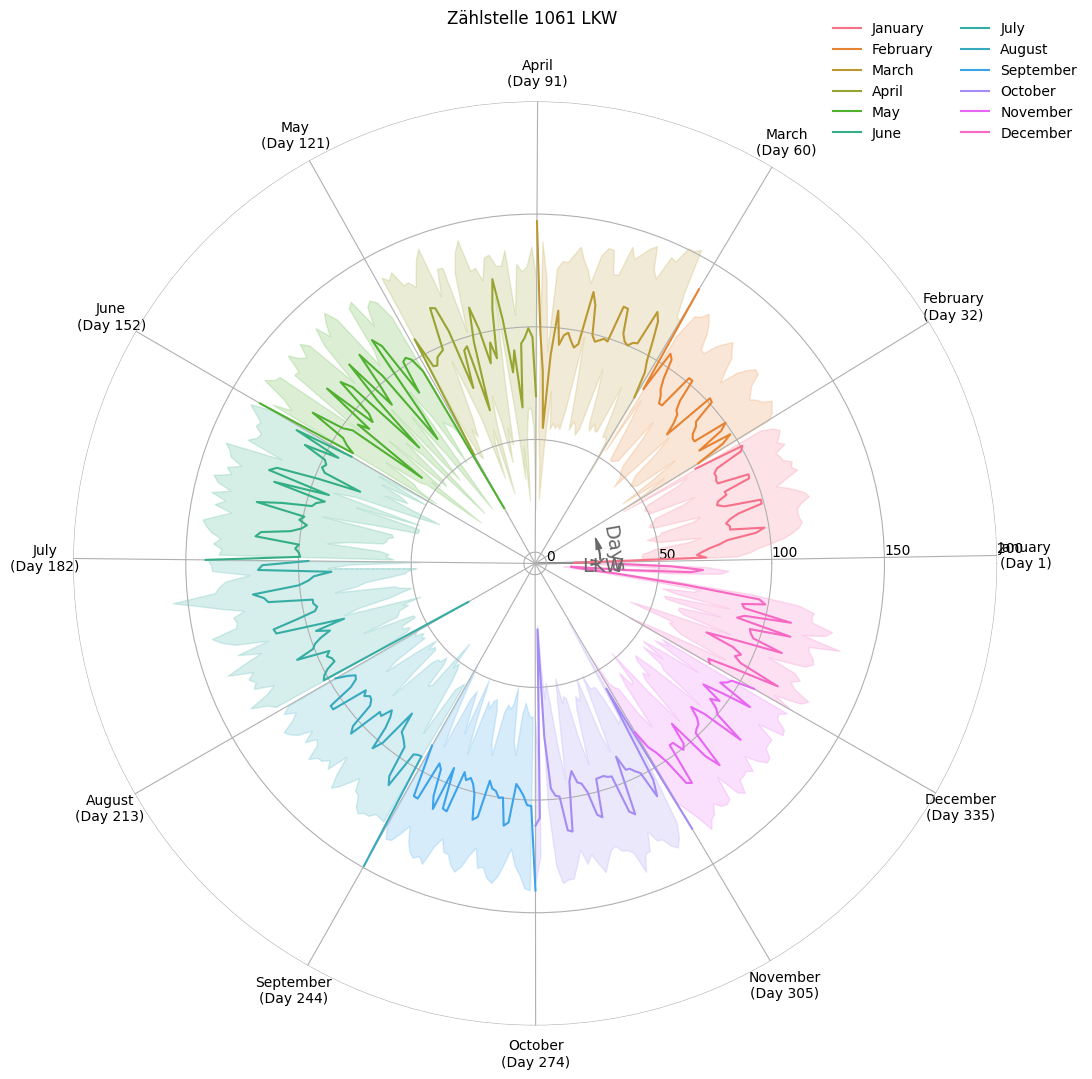

In [40]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
daily_df1061_lkw \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='LKW', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

fancy_plot=True     #this is only to make the plot more beautiful. If you just want to see how the data looks without the adjustments to the plot set fancy_plot to False
if(fancy_plot): 
    days_per_month=[0] + [monthrange(2021, i)[1] for i in range(1,12)]      #findout how many days each month has ()
    month_start=np.cumsum(days_per_month) +1                                #add 1 to start at 0 instead of 0, take the cumsum to get ech months starting day
    month_start_theta=[i *2 * np.pi / 365.25 for i in month_start]          #turn start day into an angle (in rad), use 365.25 as the average length of a year

    month_label=[month_name[i] for i in range(1,13)]
    month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]

    ax.set_title('Zählstelle 1061 LKW ', va='bottom',pad=22);
    ax.spines.clear()
    
    ax.set_xlabel('')
    ax.set_xticks(month_start_theta)
    ax.set_xticklabels(month_label_long)
    
    ax.set_ylabel('')    
    ax.set_ylim(-5,28)
    ax.set_yticks(yt:=[0,50,100,150,200])
    ax.set_yticklabels([str(t) for t in yt], rotation = 45)

    #Arrows / Annotations
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="dimgrey")
    ax.set_rlabel_position(1) 
    ax.text(13*2*np.pi/360,24,"Days",size=14,color='dimgrey',rotation=-80,va='center')
    ax.text(-3*2*np.pi/360,16,"LKW",size=14,color='dimgrey',rotation=-0,va='center')
    a1 = patches.FancyArrowPatch((1*np.pi/180, -5), (1*np.pi/180, 26), **kw)

    a2 = patches.FancyArrowPatch((1*np.pi/180, 24), (25*np.pi/180, 24),
                                connectionstyle=f"arc3,rad={0.105}", **kw)
    
    ax.add_patch(a1)
    ax.add_patch(a2)


    ax.set_rorigin(-5)
    ax.xaxis.set_tick_params(which='major',pad=10)

    ax.legend(labels=month_label,ncol=2,facecolor='white',edgecolor='white',bbox_to_anchor=(1.1, 1.1), loc=1)

    ax.figure.set_figwidth(12)
    ax.figure.set_figheight(12)


#ax.figure.savefig("../images/LKW_1061_polar.png",dpi=300)